<a href="https://colab.research.google.com/github/waghvaishnav/Deep-Learning-PlayGround-Hub/blob/main/HandWritten_Digit_Classification(PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handwritten Digits Classification in Deep Learning (PyTorch)

importing Modules

In [2]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

data splitting

In [53]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

train_data = datasets.MNIST(root="data",
                            download=True,
                            train=True,
                            transform=transform,
                            )

test_data = datasets.MNIST(root="data",
                           download=True,
                           train=False,
                           transform=transform)

In [54]:
len(train_data)

60000

In [55]:
len(test_data)

10000

dataloaders

In [56]:
train = DataLoader(train_data,batch_size =70,shuffle=False)
test = DataLoader(test_data,batch_size=70,shuffle=False)

In [57]:
data_iter = iter(train)
img , labels  =next(data_iter)

In [58]:
labels

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0])

Visualizes the digits

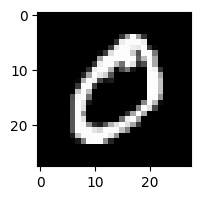

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(img[1].squeeze(),cmap="gray")
plt.show()

In [28]:
labels[1]

tensor(0)

define a function for the prediction

In [39]:
class DigitsClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(nn.Flatten(),
                                 nn.Linear(784,128),
                                 nn.ReLU(),
                                 nn.Linear(128,64),
                                 nn.ReLU(),
                                 nn.Linear(64,10))
  def forward(self,x):
     return self.network(x)

In [40]:
model = DigitsClassifier()
optimize = optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.CrossEntropyLoss()

In [41]:
len(train)

858

In [49]:
epochs = 5

for epoch in range(epochs):
  for img,lab in train:
    # forward

    pred = model(img)
    loss = criterion(pred,lab)
    # print(pred.shape)
    # print(lab.shape)
    # break

    # backward pass
    optimize.zero_grad()
    loss.backward()

    # update weights
    optimize.step()
  print(f" epoch : {epoch + 1}, loss : {loss.item():.4f}")

 epoch : 1, loss : 0.0319
 epoch : 2, loss : 0.0306
 epoch : 3, loss : 0.0288
 epoch : 4, loss : 0.0295
 epoch : 5, loss : 0.0275


## Evaluation of the model

In [76]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
  for im,la in test:
   eval_pred = model(im)
   _,predicted_output = torch.max(eval_pred,1)
  #  print(predicted_output.data,1)
  #  print(la,"\n")
  #  print((predicted_output == la).sum())

   correct += ((predicted_output == la).sum()).item()
   total += la.size(0)

print(f"total accuracy on test set {100*correct /total:.2f}% ")

total accuracy on test set 92.06% 


In [66]:
64/70

0.9142857142857143

In [67]:
la.size(0)

70